In [1]:
# Please visit:
#
# https://download.nkg-mn.com/credo/anomalies/
#
# Pretrained dots_100000.h5 and others can be downloaded from mentioned website.

In [1]:
from commons import *
from dataset_loader import load_from_file
from IPython.display import display
import matplotlib.pyplot as plt
import cv2

DOTS_DST = 'cache/dots_100000.pickle'
TRACKS_DST = 'cache/tracks_100000.pickle'
WORMS_DST = 'cache/worms_100000.pickle'
ARTIFACTS_DST = 'cache/artifacts_100000.pickle'

DOTS_AC = 'cache/dots_100000.h5'
TRACKS_AC = 'cache/tracks_100000.h5'
WORMS_AC = 'cache/worms_100000.h5'
ARTIFACTS_AC = 'cache/artifacts_100000.h5'


def train_and_test(train_set, validation_set, fn):
    autoencoder = original_autoencoder()
    autoencoder = train_or_cache(train_set, autoencoder, fn, validation_set=validation_set, force_train=True)

    for df_func, df_name in zip(
            [dm_func_mean],
            ['mean']
    ):
        for img_set, set_names in zip([validation_set], ['train']):
            decoded = autoencoder.predict(img_set)

            vis, errors = visualize_predictions(decoded, img_set, df_func, False, 16)
            img_path = fn.replace('.h5', '-vis.png')
            hist_path = fn.replace('.h5', '-hist.png')
            cv2.imwrite(img_path, vis)
            display(Image.open(img_path))
            if len(img_set) > 256:
                vis, errors = visualize_predictions(decoded, img_set, df_func, False)
                img_path = fn.replace('.h5', '-vis_full.png')
                cv2.imwrite(img_path, vis)

            plt.figure(figsize=(8,6))
            plt.hist(errors, bins=100, alpha=0.5, label=set_names)
            plt.xlabel("Data", size=14)
            plt.ylabel("Count", size=14)
            plt.title(df_name)
            plt.legend(loc='upper right')
            plt.savefig(hist_path)


def load_and_train(src, out):
    images, augmented = load_from_file(src)
    train_and_test(np.expand_dims(augmented, axis=-1), np.expand_dims(images, axis=-1), out)

In [1]:
load_and_train(DOTS_DST, DOTS_AC)

320
0
128
18496
0
256
0


320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/200
3161/3161 [==============================] - 36s 11ms/step - loss: 0.0137 - accuracy: 0.9782 - val_loss: 1.3829e-04 - val_accuracy: 0.9959
Epoch 2/200
3161/3161 [==============================] - 36s 11ms/step - loss: 1.2682e-04 - accuracy: 0.9909 - val_loss: 1.0872e-04 - val_accuracy: 0.9959
Epoch 3/200
3161/3161 [==============================] - 36s 11ms/step - loss: 9.9835e-05 - accuracy: 0.9909 - val_loss: 8.9419e-05 - val_accuracy: 0.9959
Epoch 4/200
3161/3161 [==============================] - 35s 11ms/step - loss: 8.2939e-05 - accuracy: 0.9909 - val_loss: 8.2894e-05 - val_accuracy: 0.9959
Epoch 5/200
3161/3161 [==============================] - 36s 11ms/step - loss: 7.3781e-05 - accuracy: 0.9909 - val_loss: 6.4780e-05 - val_accuracy: 0.9959
Epoch 6/200
3161/3161 [==============================] - 35s 11ms/step - loss: 6.6490e-05 - accuracy: 0.9909 - val_loss: 6.3916e-05 - val_accuracy: 0.9959
Epoch 

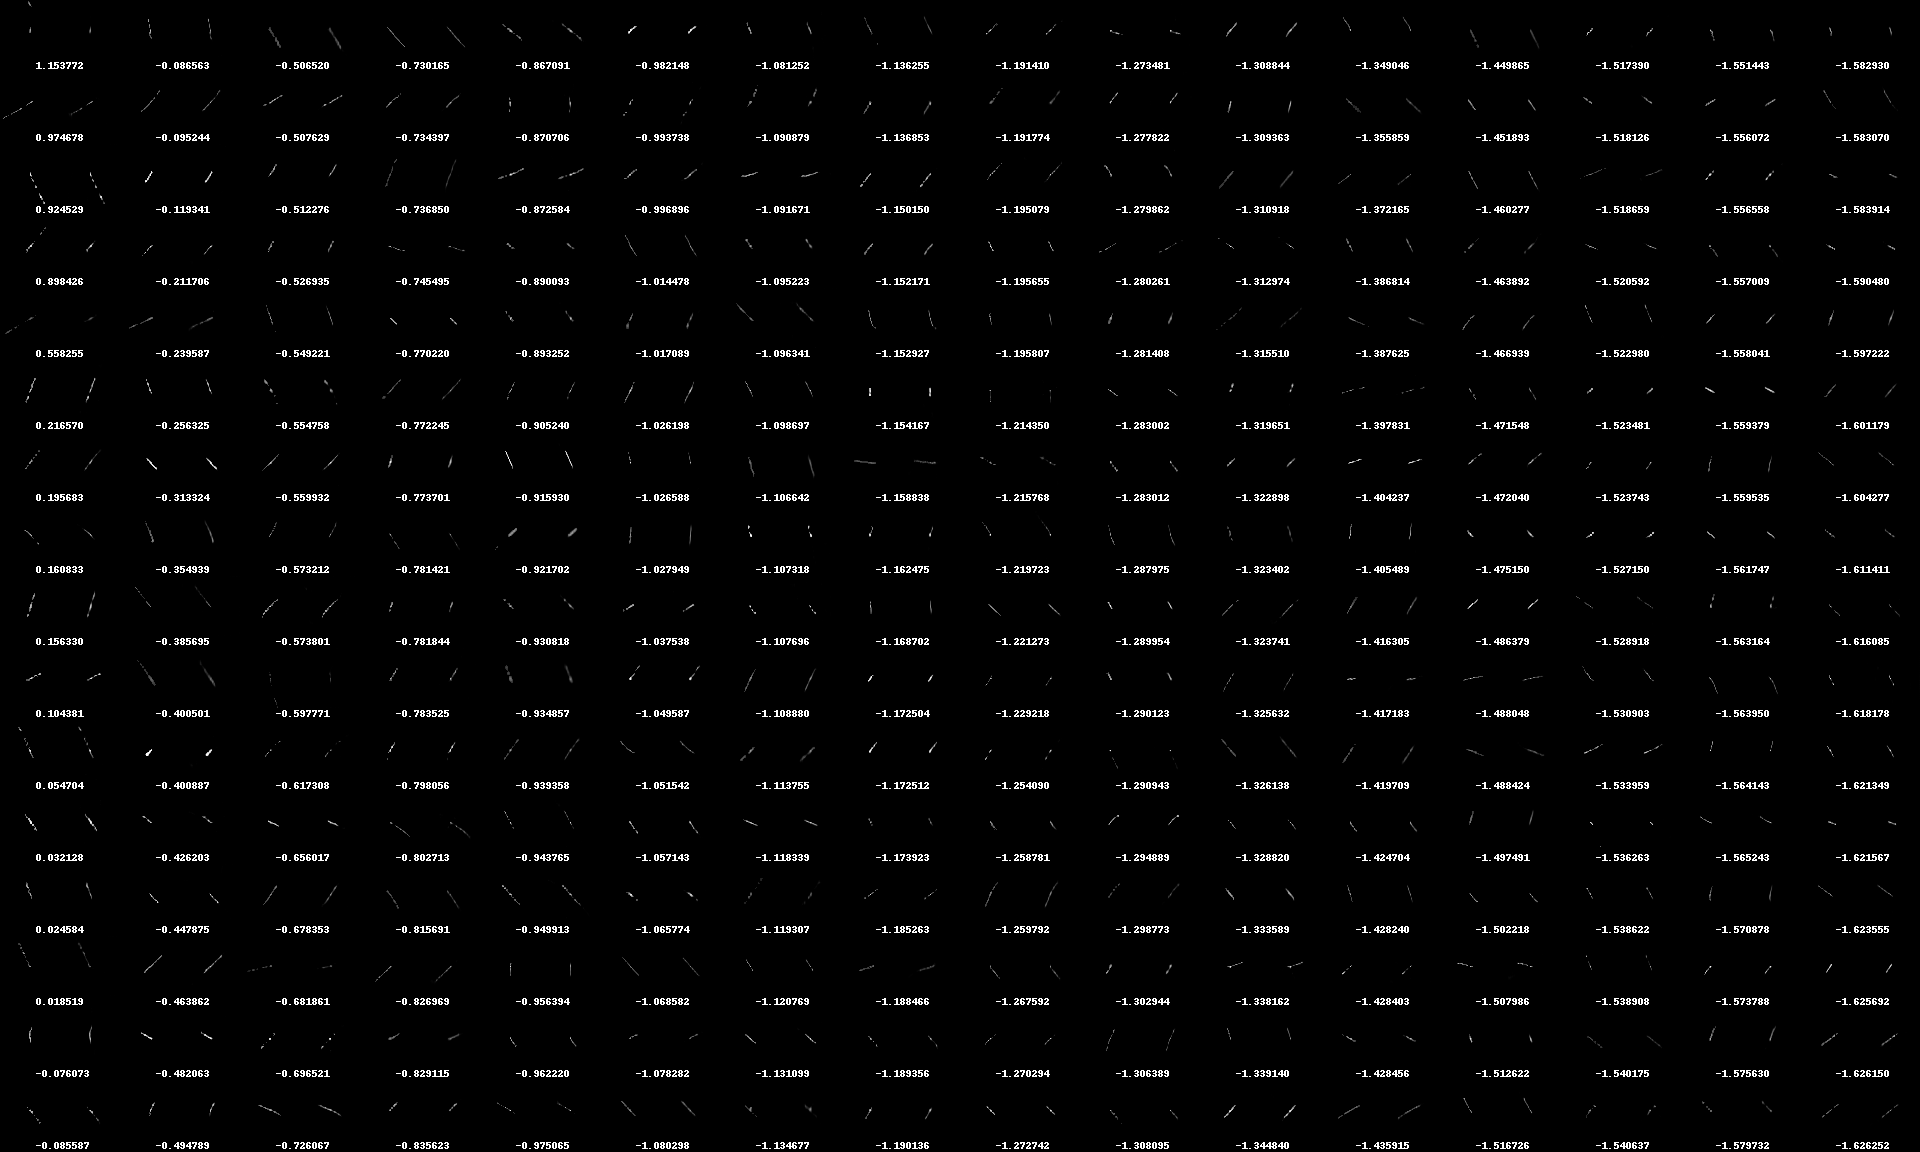

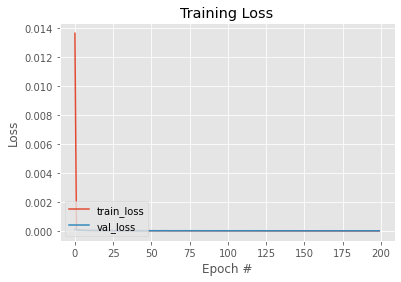

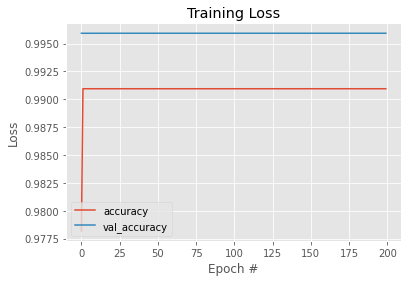

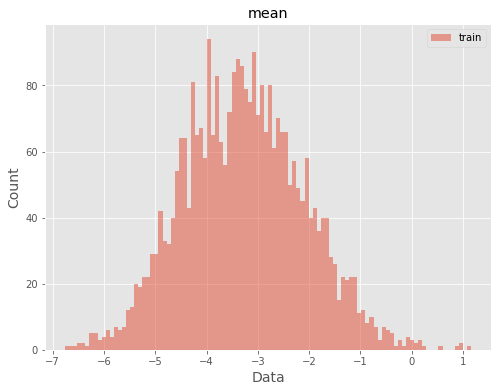

In [4]:
load_and_train(TRACKS_DST, TRACKS_AC)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/200
3131/3131 [==============================] - 35s 11ms/step - loss: 0.0084 - accuracy: 0.9796 - val_loss: 8.5440e-04 - val_accuracy: 0.9931
Epoch 2/200
3131/3131 [==============================] - 37s 12ms/step - loss: 8.1459e-04 - accuracy: 0.9861 - val_loss: 6.4016e-04 - val_accuracy: 0.9931
Epoch 3/200
3131/3131 [==============================] - 33s 11ms/step - loss: 6.5716e-04 - accuracy: 0.9861 - val_loss: 5.2849e-04 - val_accuracy: 0.9931
Epoch 4/200
3131/3131 [==============================] - 33s 11ms/step - loss: 5.8829e-04 - accuracy: 0.9862 - val_loss: 4.9392e-04 - val_accuracy: 0.9931
Epoch 5/200
3131/3131 [==============================] - 33s 11ms/step - loss: 5.3256e-04 - accuracy: 0.9862 - val_loss: 4.6444e-04 - val_accuracy: 0.9931
Epoch 6/200
3131/3131 [==============================] - 33s 11ms/step - loss: 4.8846e-04 - accuracy: 0.9862 - val_loss: 4.4422e-04 - val_accuracy: 0.9931
Epoch 

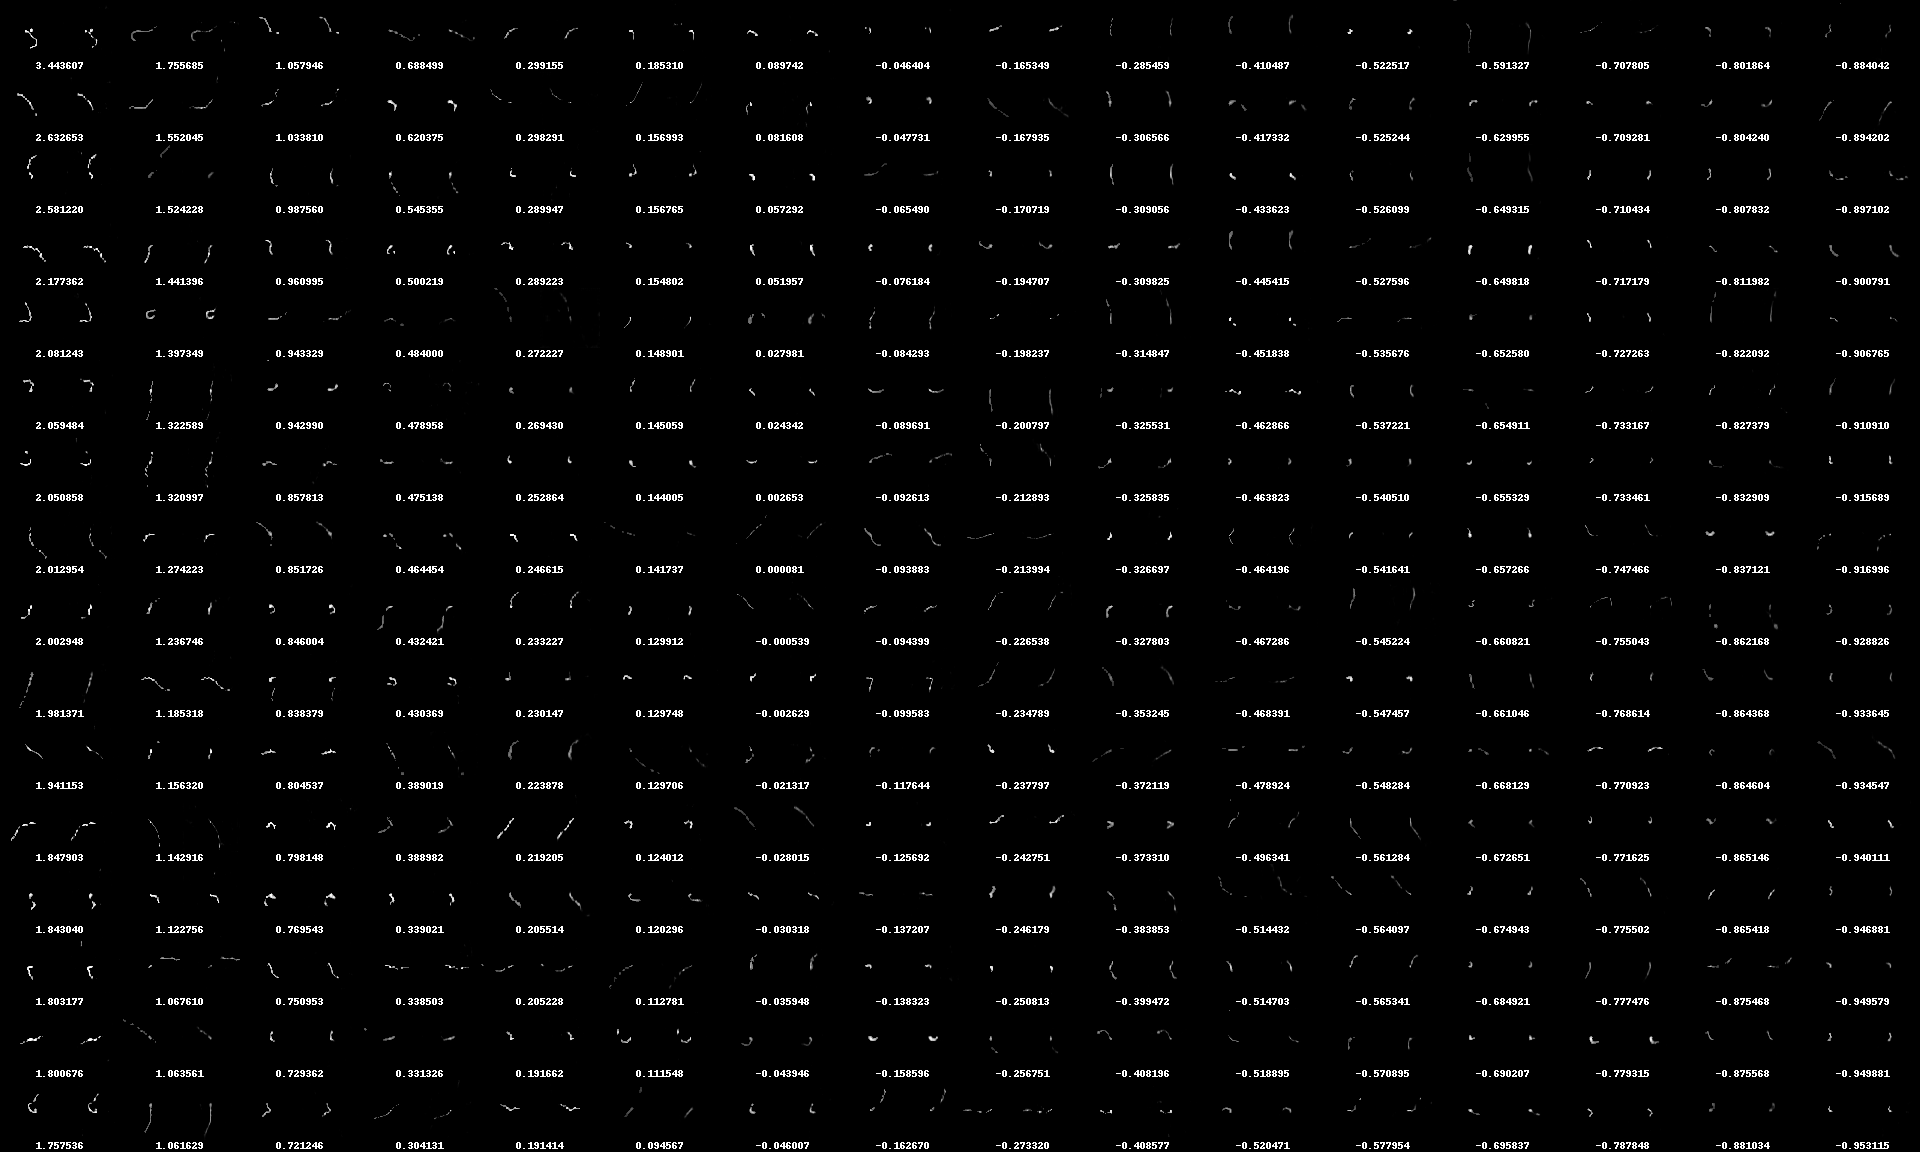

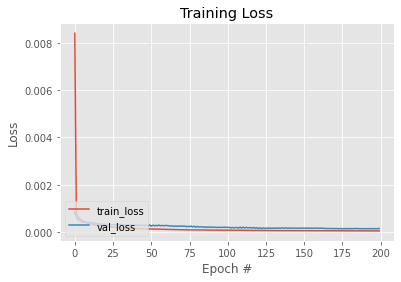

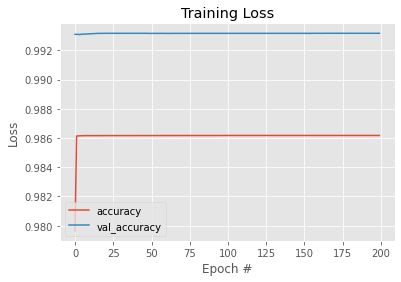

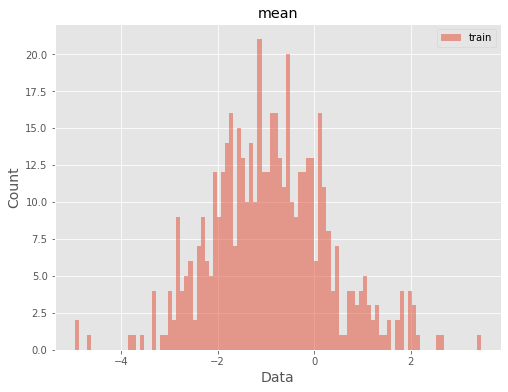

In [5]:
load_and_train(WORMS_DST, WORMS_AC)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/200
3130/3130 [==============================] - 48s 15ms/step - loss: 0.0025 - accuracy: 0.9887 - val_loss: 7.8389e-04 - val_accuracy: 0.9947
Epoch 2/200
3130/3130 [==============================] - 42s 14ms/step - loss: 6.1782e-04 - accuracy: 0.9895 - val_loss: 0.0030 - val_accuracy: 0.9947
Epoch 3/200
3130/3130 [==============================] - 41s 13ms/step - loss: 4.7818e-04 - accuracy: 0.9895 - val_loss: 7.2180e-04 - val_accuracy: 0.9947
Epoch 4/200
3130/3130 [==============================] - 40s 13ms/step - loss: 4.0758e-04 - accuracy: 0.9895 - val_loss: 0.0011 - val_accuracy: 0.9947
Epoch 5/200
3130/3130 [==============================] - 38s 12ms/step - loss: 3.5890e-04 - accuracy: 0.9895 - val_loss: 5.3419e-04 - val_accuracy: 0.9947
Epoch 6/200
3130/3130 [==============================] - 40s 13ms/step - loss: 3.0963e-04 - accuracy: 0.9895 - val_loss: 4.5469e-04 - val_accuracy: 0.9947
Epoch 7/200
31

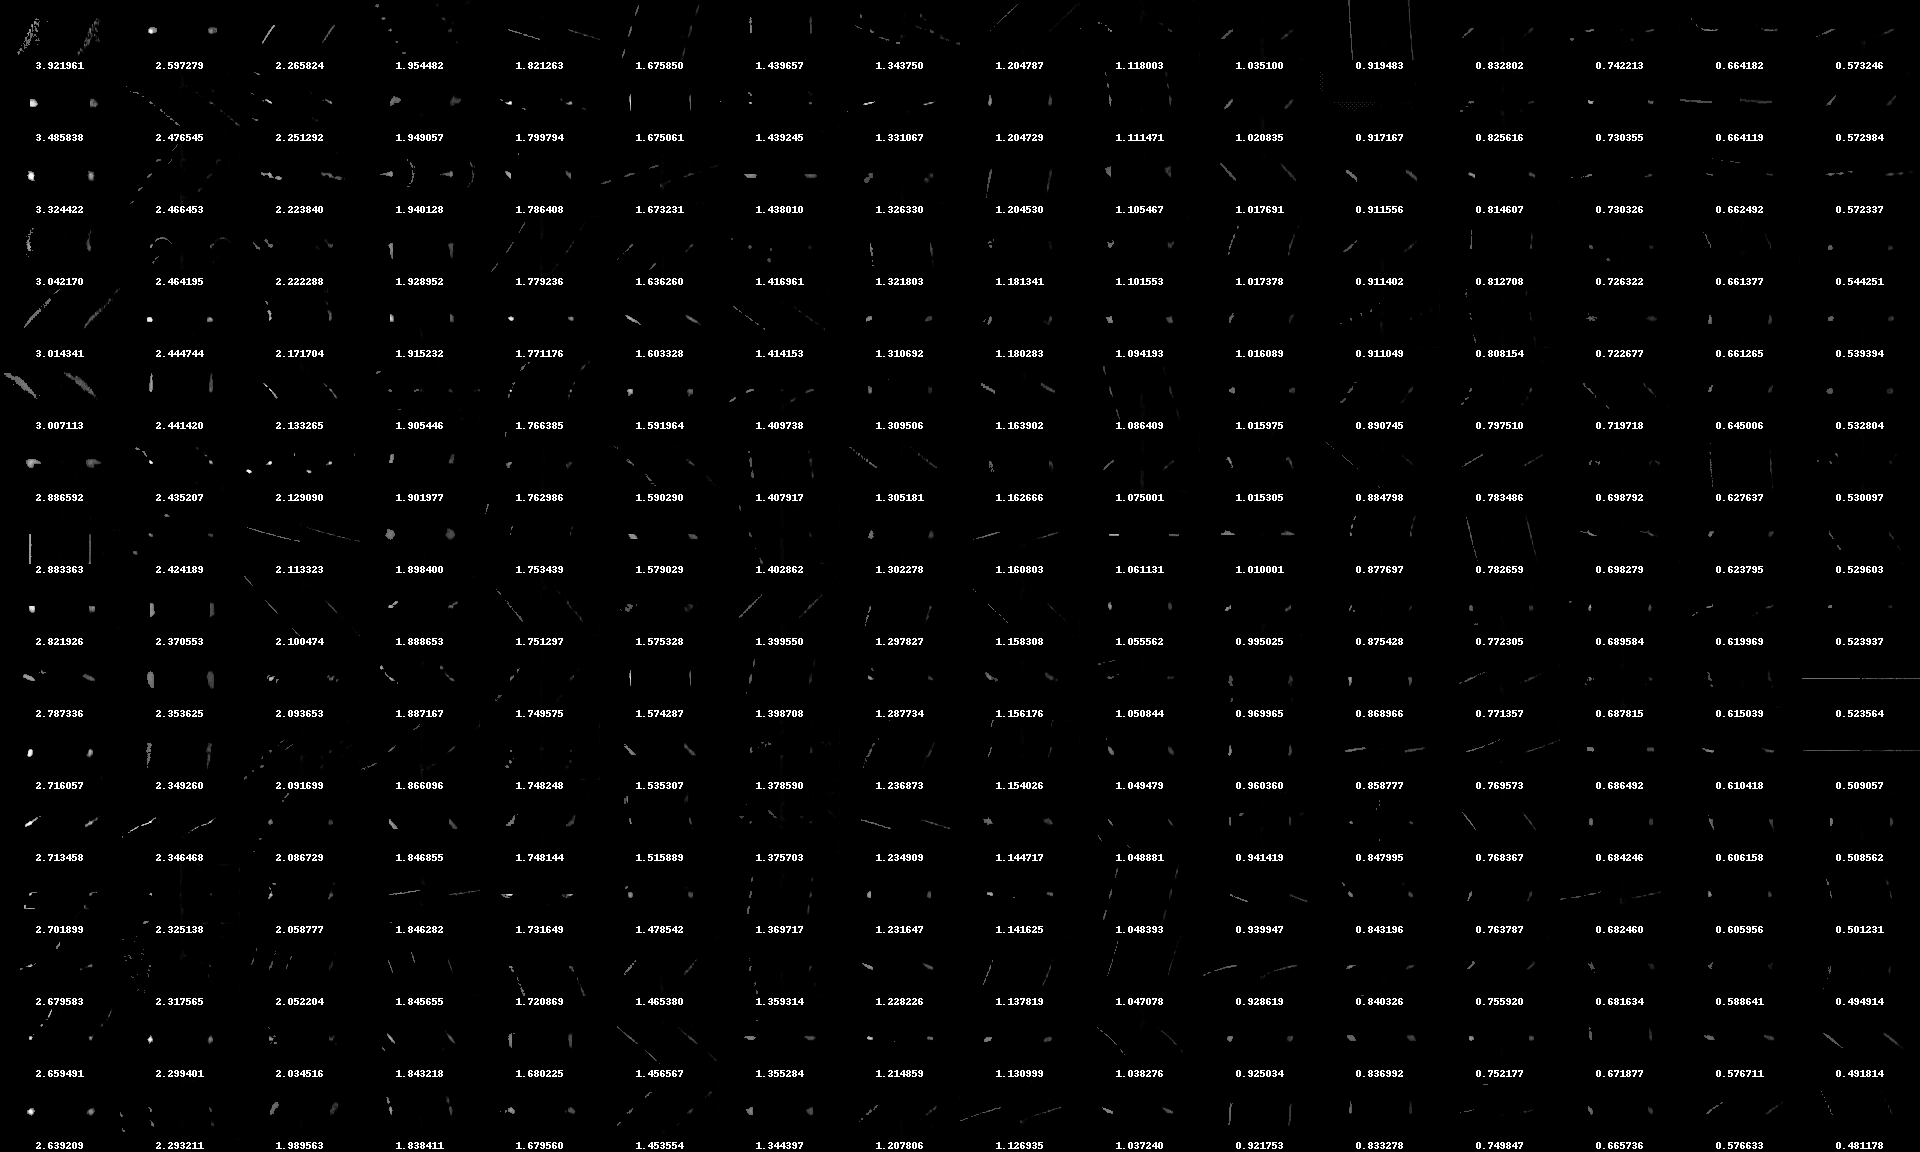

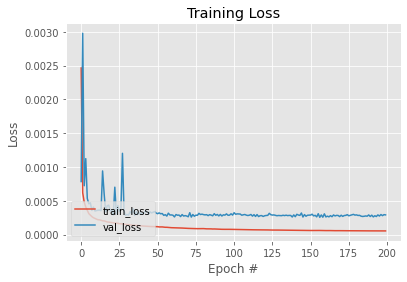

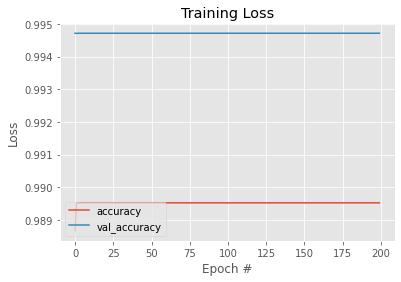

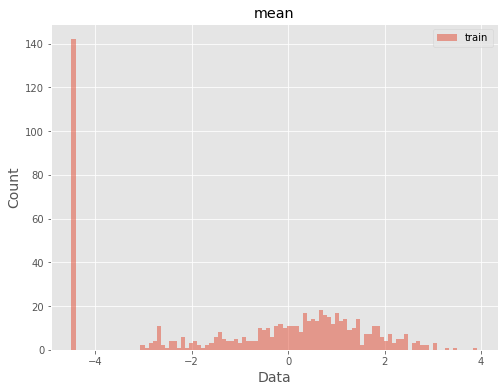

In [7]:
load_and_train(ARTIFACTS_DST, ARTIFACTS_AC)